# 다중 회귀

- 여러 개의 특성을 사용한 선형 회귀

- 회귀식

    - 종속변수 = w1 * x1 + w2 * x2 + ... + y절편
 
<img src="./image/multiple_regression.png">

## 특성 공학(feature engineering)

- 기존의 특성을 사용해 새로운 특성을 만들어내는 작업

- 특성 공학 기법
    - 차원 축소
        - 특성 선정
            - 특성 랭킹 또는 특성 중요도에 따라 선정
            - 분석가의 사전 배경 지식을 이용하거나, 랜덤 선정 및 측정을 반복하는 방법
        - 특성 추출(Feature Extraction)
            - 특성들의 조합으로 새로운 특성을 생성
         
    - 스케일링
        - 변수의 분포가 편향되어 있을 경우, 변수 간의 관계가 잘 드러나지 않는 겨우 범위 변환
     
    - 변형(Transform)
        - 기존에 존재하는 변수의 성질을 이용해 다른 변수를 생성하는 방법
            - 예) 날짜별 데이터에 주말 여부 추가
         
    - 비닝(Binning)
        -  연속형 변수를 범주형 변수로 변환
            -  예) 33세, 37세 => 30대, 40대
         
    - 더미(Dummy)
        -  범주형 변수를 연속형 변수로 변환
        -  기존 특성이나 특성의 조합을 규칙에 따라 수치화하여 추가

In [11]:
# 독립변수를 늘렸을때 어떻게 되는지 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler #다항회귀에 적합한
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [12]:
df = pd.read_csv("./data/Fish.csv")
df = df.loc[df["Species"] == "Perch", ["Weight","Length2","Height","Width"]]

In [13]:
x = df.drop("Weight", axis = 1)
y= df["Weight"]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y,
    test_size = 0.25,
    random_state = 31
)

<hr>

#### PolynomialFeatures 사용 예시

In [15]:
pf = PolynomialFeatures()
pf.fit_transform([[2, 3]])

array([[1., 2., 3., 4., 6., 9.]])

In [16]:
# 특성이 어떻게 만들어졌는지 확인
pf.get_feature_names_out()

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

- include_bias : 절편을 추가해주는 파라미터
- 사이킷런의 선형 회귀 모형은 자동으로 절편을 추가해주기 때문에 굳이 절편을 추가할 필요가 없음

In [18]:
pf = PolynomialFeatures(include_bias = False)
pf.fit_transform([[2, 3]])

array([[2., 3., 4., 6., 9.]])

### 예시 끝
<hr>

In [21]:
# 실전 적용
pf = PolynomialFeatures(include_bias = False)
poly_train = pf.fit_transform(x_train)
poly_test = pf.fit_transform(x_test)

- PolynomialFeatures 는 별도의 통계값을 저장하지 않아서 테스트 세트를 함께 변환해도 차이가 없지만 항상 훈련데이터를 기준으로 학습하고 테스트 데이터를 변환하는 습관을 들이는 것이 중요

In [22]:
x_train.shape

(42, 3)

In [23]:
poly_train.shape

(42, 9)

In [24]:
# 컬럼이 늘어났다

# 모델 훈련

In [26]:
# 특성공학 전 데이터로 학습한 모델
lr_org = LinearRegression()
lr_org.fit(x_train, y_train)
print(lr_org.score(x_train,y_train))
print(lr_org.score(x_test,y_test))

0.9616592261738384
0.8866503661747722


- 독립변수가 많아지니 정확도가 올라감

In [27]:
lr_poly = LinearRegression()
lr_poly.fit(poly_train, y_train)
print(lr_poly.score(poly_train,y_train))
print(lr_poly.score(poly_test,y_test))

0.9886480618226507
0.9860653401032573


In [28]:
# 모델의 성능이 좋아짐

# 모델 최적화

- 특성을 더 추가
    - degree 매개변수 : 고차하의 최대 차수를 지정

In [32]:
pf = PolynomialFeatures(degree = 5, include_bias = False)
poly_train5 = pf.fit_transform(x_train)
poly_test5 = pf.transform(x_test)
poly_train5.shape

(42, 55)

In [35]:
# 우와 55 개나 된다!
lr_poly5 = LinearRegression()
lr_poly5.fit(poly_train5, y_train)

print(lr_poly5.score(poly_train5, y_train))
print(lr_poly5.score(poly_test5, y_test))

0.9999999999988634
-20.514820727652868


- 훈련 데이터에 대해서는 완벽하게 학습했음

- 테스트데이터에 대해서는 분산보다 오차가 큼
    - 데이터의 평균으로 찍는 것 보다 성능이 떨어짐
    - 과대적합

# 규제(regularization)

- 머신러닝 모델이 훈련 세트를 과도하게 학습하지 못하도록 방지하는 것
    - 선형 회귀 모델의 경우에는 특성의 **기울기 크기**를 제한
 
- 선형 회귀 모델에 규제를 가하는 방법에 따라 릿지/라쏘 모델로 나뉨

- 릿지 모델
    - 계수를 제곱한 값을 제한
    - L2 규제
- 라쏘
    - 계수를 절댓값을 제한
    - L1규제

In [45]:
# 일반적으로 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 제어가 힘듦
ss = StandardScaler()
scaled_train = ss.fit_transform(poly_train5)
scaled_test = ss.transform(poly_test5)

# 릿지 회귀

In [46]:
rid = Ridge()
rid.fit(scaled_train, y_train)
print(rid.score(scaled_train, y_train))
print(rid.score(scaled_test, y_test))

0.9869232082187326
0.989394781030973


In [47]:
# 규제는 됐는디 과소적합 의심됨

## 초매개변수(hyperparameter)

- 머신러닝 모델이 학습할 수 없고 사람이 설정해야하는 파라미터
- 사이킷런 모델에서 하이퍼파라미터는 클래스이 매개변수로 표현

## 릿지 모델 하이퍼파라미터 튜닝

- alpha : 규제의 강도
  
- alpha 값이 크면
    - 규제의 강도가 세짐
    - 계수의 값을 줄이고 과소적합을 유도
- alpha 값이 작으면
    - 규제의 강도 약해짐
    - 과대적합가능성이 커짐

In [48]:
train_hist = []
test_hist = []
alpha_li = [0.001, 0.01, 0.1, 1, 10, 100] # alpha 값 예시임

for alpha in alpha_li:
    rid = Ridge(alpha = alpha)
    rid.fit(scaled_train, y_train)

    train_hist.append(rid.score(scaled_train, y_train))
    test_hist.append(rid.score(scaled_test, y_test))

In [49]:
train_hist

[0.9952522353273219,
 0.9935043726619194,
 0.9899186276587573,
 0.9869232082187326,
 0.9842779005326657,
 0.9742092632197252]

In [50]:
test_hist

[0.980160437821577,
 0.9843691896767586,
 0.9885542442827244,
 0.989394781030973,
 0.9914994303656964,
 0.9855936278892571]

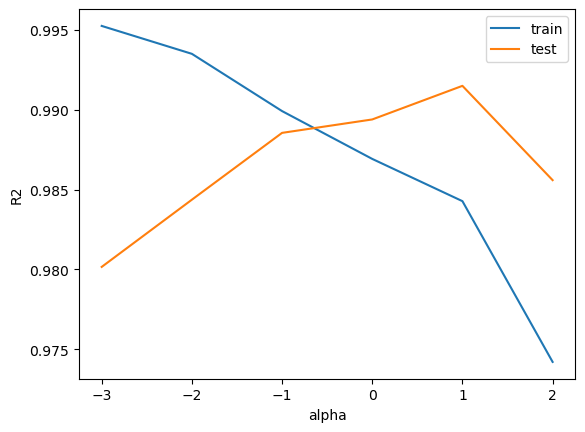

In [51]:
# 시각화 해보자
plt.figure()
# alpha 값을 그대로 x에 적용하면 간격이 서로 다르기 때문에 로그 함수로 바꾸어서 시각화
plt.plot(np.log10(alpha_li),train_hist)
plt.plot(np.log10(alpha_li),test_hist)

plt.xlabel("alpha")
plt.ylabel("R2")
plt.legend(["train","test"])
plt.show()

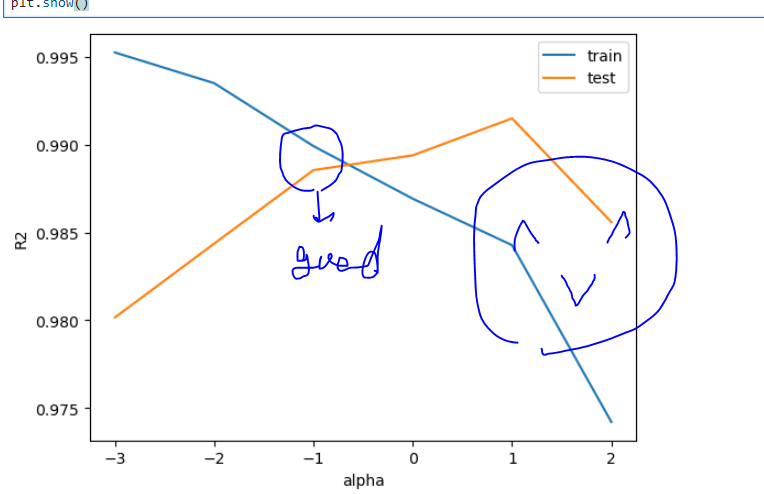

- alpha 가 작을 때는 훈련데이터에만 잘 맞고 테스트 데이터에는 못 맞힘?
    - 과대적합이 일어났음

- alpha 가 커질수록 훈련 데이터 점수가 낮아짐
    - 과소적합이 유도되고 있음

- 테스트 데이터 에서 높은점수는 0.1

In [52]:
rid = Ridge(alpha = 0.1)
rid.fit(scaled_train, y_train)
print(rid.score(scaled_train, y_train))
print(rid.score(scaled_test, y_test))

0.9899186276587573
0.9885542442827244


# 라쏘 회귀

In [53]:
las = Lasso()

In [54]:
las.fit(scaled_train, y_train)
print(las.score(scaled_train, y_train))
print(las.score(scaled_test, y_test))

0.9860446059275106
0.9888165087851964


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.633e+02, tolerance: 4.461e+02
  model = cd_fast.enet_coordinate_descent(


## 라쏘 모델 하이퍼파라미터 튜닝

In [55]:
train_hist = []
test_hist = []
alpha_li = [0.001, 0.01, 0.1, 1, 10, 100] # alpha 값 예시임

for alpha in alpha_li:
    las = Lasso(alpha = alpha)
    las.fit(scaled_train, y_train)

    train_hist.append(las.score(scaled_train, y_train))
    test_hist.append(las.score(scaled_test, y_test))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.928e+04, tolerance: 4.461e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.904e+04, tolerance: 4.461e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.007e+04, toleranc

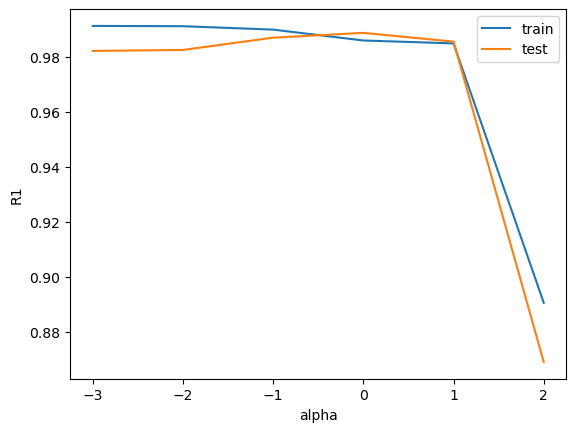

In [57]:
# 시각화 해보자
plt.figure()
# alpha 값을 그대로 x에 적용하면 간격이 서로 다르기 때문에 로그 함수로 바꾸어서 시각화
plt.plot(np.log10(alpha_li),train_hist)
plt.plot(np.log10(alpha_li),test_hist)

plt.xlabel("alpha")
plt.ylabel("R1")
plt.legend(["train","test"])
plt.show()

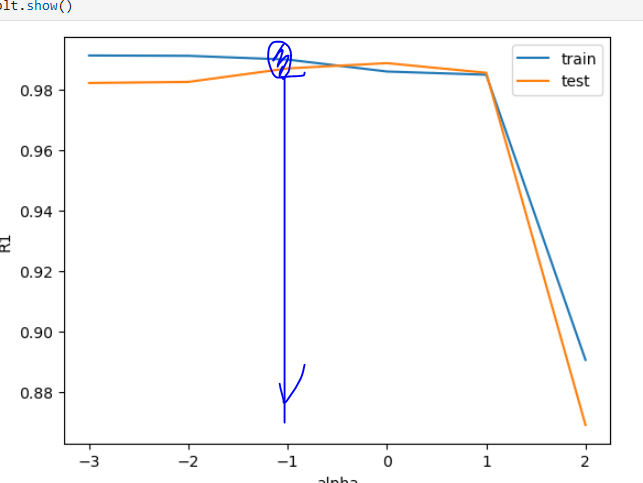

In [58]:
# 모델 성능이 가장 높은 지점확인
las = Lasso(alpha = 0.1)
las.fit(scaled_train, y_train)
print(las.score(scaled_train, y_train))
print(las.score(scaled_test, y_test))

0.9899968494012047
0.9870708474618861


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.007e+04, tolerance: 4.461e+02
  model = cd_fast.enet_coordinate_descent(


- 라쏘 모델의 특성이 있어요

In [60]:
las.coef_

array([-114.05934439,   -0.        ,  -51.65294754,  199.74145861,
         26.92105369,   10.13713481,   15.224417  ,    0.        ,
         97.09282502,   72.01790574,    5.52782693,    0.8766925 ,
          5.55869327,    0.        ,   31.10262467,    0.        ,
          0.        ,    0.        ,  118.92457578,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,   -0.        ,   -0.        ,
          0.        ,    0.        ,   -0.        ,   -7.61607046,
         -0.        ,   39.00860979,    0.        ,    0.        ,
         -0.        ,    1.39990571,   -0.        ,  -61.88130766,
         54.55435009,   -0.        ,  -85.86345278,   -0.39971201,
         86.47915799,  -11.02997827, -108.59121879,   -9.31693435,
         -0.        ,  119.46033821,  -26.57545606, -119.28504066,
        -14.96871806,   -0.        ,   57.88117896])

- 라쏘 모델은 기울기를 아예 0으로 만드는 경우가 있음
    - 현재 26개의 독립변수의 기울기를 0으로 만들어 사용하지 않음
    - 이런 특징을 이용해 유용한 특성을 선택하는 용도로 씀

# Ridge, Lasso, ElasticNet

- Ridge
- 계수 정규화
    - 전체 변수를 모두 유지함녀서 각 변수의 계수 크기를 조정
    - 종속 변수 예측에 거의 영향을 미치지 않는 변수는 0 에 가까운 가중치를 주게 하여 독립변수들의 영향력을 조정
    - 위의 과정을 통해 다중공선성을 방지하면서 모델의 설명력을 최대
    - L2-norm
    - 매개변수 alpha 값을 조정하여 정규화 수준을 조정
    - 0 이면 선형회귀와 동일
    - 값이 클수록 독립변수들의 영향력이 작아짐 평균을 지나는 수평선이 됨
- Lasso
    - Ridge와 유사하지만 중요한 몇 개의 변수만 선택하고 나머지 변수들은 계수를 0으로 변수의 영향력을 아예 없애는 점이 차이점
    - L1-norm
    - 매개변수 alpha 값을 조정하여 정규화 강도를 조정

<img src="./image/ridge_lasso_elastic.png">

- ElasticNet
    - Ridge 와 Lasso 의 최적화 지점이 다르기 때문에 두 정규화 항을 절충한 모델
    - Ridge 는 변환된 계수가 0이 될수없음 + Lasso 는 변환된 계수가 0이 될수 있음

- Ridge 와 Lasso 의 혼합비율 조절 성능 최적화
- 혼합비율이 0에 가까울수록 Ridge 와 같아짐
- 혼합비율이 1에 가까울수록 Lasso 와 같아짐
- 독립변수를 이미 잘 정제해서 중요할 것으로 판단되는 변수들만 잘 선별해둔 상태라면 Ridge 의 비율을 높이는것이 유리
- 변수 모두 사용하면 Lasso의 비율이 높이는 것

# P-value 와 R-square 값에 따른 회귀모델 튜닝

- R-square 가 높고 P-value 가 0.05 미만인 경우
    - 통계적으로 의미가 있으며, 모델 설명력이 높음
        - 이상적인 모형
        - 주요 인자 추출
 
- R-square 가 낮고 P-value 가 0.05 가 미만인 경우
    - 통계적으로 의미가 있으나, 모델 설명력이 낮음
        - 이상치 제거
        - 비선형 회귀 분석 적용
 
- R-sqaure 가 높고 P-value 가 0.05 보다 높은 경우
    - 통계적으로 의미가 없으나, 모델 설명력이 높음
        - 데이터 확보
        - 이상치 제거
 
- R-square 가 낮고 P-value 가 0.05 보다 높은 경우
    - 통계적으로 의미가 없으며, 모델 설명력이 낮음 / 혹은 비선형적인 관계일수있음
    - 분석 똑바로해(무지성 코드를 치면 이렇게 됨)
        - 새로운 변수 탐색
        - 비선형 회귀분석 적용

In [61]:
# 실습은 하지 않을것이다